In [147]:
import pandas as pd
import seaborn as sns

In [210]:
df_resultados = pd.read_csv("resultados_experimentos.csv", index_col=0)
df_resultados

,params,model_name,mean_test_accuracy,std_test_accuracy,mean_test_f1,std_test_f1,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.678586,0.045571,0.789059,0.036740,0.715941,0.043175,0.881419,0.052536
1,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.629596,0.079630,0.741110,0.069190,0.703960,0.055860,0.783632,0.088863
2,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.612020,0.070742,0.718735,0.060193,0.712610,0.057571,0.726970,0.074309
3,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.625152,0.071434,0.716771,0.067663,0.736442,0.062988,0.699274,0.076368
4,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.687374,0.066500,0.790253,0.051520,0.725876,0.045111,0.867377,0.061093
...,...,...,...,...,...,...,...,...,...,...
1,"{'SVMPred__C': 0.1, 'SVMPred__kernel': 'rbf'}",CargosMulticat + SVM,0.548182,0.184524,0.492152,0.402452,0.417778,0.342655,0.600000,0.489898
2,"{'SVMPred__C': 1, 'SVMPred__kernel': 'linear'}",CargosMulticat + SVM,0.500202,0.036084,0.575719,0.076004,0.686050,0.037687,0.510494,0.118509
3,"{'SVMPred__C': 1, 'SVMPred__kernel': 'rbf'}",CargosMulticat + SVM,0.509192,0.062506,0.582940,0.110113,0.681361,0.034857,0.529940,0.162868
4,"{'SVMPred__C': 10, 'SVMPred__kernel': 'linear'}",CargosMulticat + SVM,0.504545,0.041972,0.576059,0.095626,0.685857,0.024666,0.516716,0.151984


In [211]:
import re

pattern = re.compile("\(\d, \d\)")
def extract_n_gram_range(v_string):
    search_result = pattern.search(v_string)
    result = None
    if search_result is not None: 
        result = search_result.group(0)
    return result

#string = df_resultados["params"][0]
#print(extract_n_gram_range(string))

df_resultados["n_grams_range"] = df_resultados["params"].apply(lambda x: extract_n_gram_range(x))

In [212]:
# variable que indica si el modelo es una combinación de TF-IDF con n-gramas
df_resultados["TFIDFNgramas"] = \
    (df_resultados["n_grams_range"] != "(1, 1)") & \
    (~df_resultados["n_grams_range"].isna()) & \
    df_resultados["model_name"].str.contains("TF-IDF")

In [213]:
# cambiar el nombre del modelo
df_resultados.loc[df_resultados["TFIDFNgramas"], "model_name"] = \
df_resultados[df_resultados["TFIDFNgramas"]]["model_name"].str.replace("TF-IDF", "(N-gramas+TF-IDF)")

df_resultados["model_name"].unique()

array(['N-gramas + RF', 'N-gramas + SVC', 'TF-IDF + RF',
       '(N-gramas+TF-IDF) + RF', 'TF-IDF + SVC',
       '(N-gramas+TF-IDF) + SVC', 'CargosMulticat + RF',
       'CargosMulticat + SVM'], dtype=object)

In [214]:
df_resultados

,params,model_name,mean_test_accuracy,std_test_accuracy,mean_test_f1,std_test_f1,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,n_grams_range,TFIDFNgramas
0,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.678586,0.045571,0.789059,0.036740,0.715941,0.043175,0.881419,0.052536,"(1, 1)",False
1,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.629596,0.079630,0.741110,0.069190,0.703960,0.055860,0.783632,0.088863,"(1, 1)",False
2,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.612020,0.070742,0.718735,0.060193,0.712610,0.057571,0.726970,0.074309,"(1, 1)",False
3,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.625152,0.071434,0.716771,0.067663,0.736442,0.062988,0.699274,0.076368,"(1, 1)",False
4,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.687374,0.066500,0.790253,0.051520,0.725876,0.045111,0.867377,0.061093,"(1, 1)",False
...,...,...,...,...,...,...,...,...,...,...,...,...
1,"{'SVMPred__C': 0.1, 'SVMPred__kernel': 'rbf'}",CargosMulticat + SVM,0.548182,0.184524,0.492152,0.402452,0.417778,0.342655,0.600000,0.489898,None,False
2,"{'SVMPred__C': 1, 'SVMPred__kernel': 'linear'}",CargosMulticat + SVM,0.500202,0.036084,0.575719,0.076004,0.686050,0.037687,0.510494,0.118509,None,False
3,"{'SVMPred__C': 1, 'SVMPred__kernel': 'rbf'}",CargosMulticat + SVM,0.509192,0.062506,0.582940,0.110113,0.681361,0.034857,0.529940,0.162868,None,False
4,"{'SVMPred__C': 10, 'SVMPred__kernel': 'linear'}",CargosMulticat + SVM,0.504545,0.041972,0.576059,0.095626,0.685857,0.024666,0.516716,0.151984,None,False


<AxesSubplot:xlabel='mean_test_precision', ylabel='mean_test_recall'>

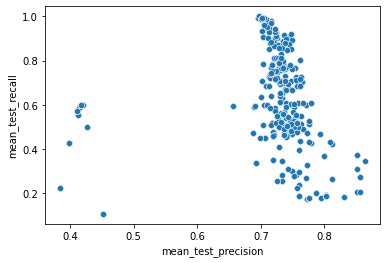

In [215]:
sns.scatterplot(x="mean_test_precision", 
                y="mean_test_recall",
                #hue="model_name",
                data=df_resultados[~df_resultados["n_grams_range"].isna()])

<AxesSubplot:xlabel='mean_test_accuracy', ylabel='mean_test_f1'>

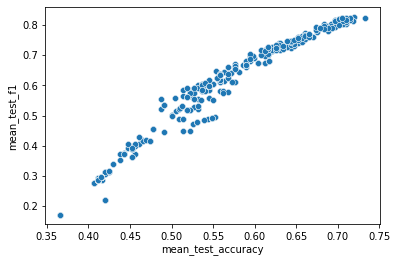

In [216]:
sns.scatterplot(x="mean_test_accuracy", 
                y="mean_test_f1",
                #hue="model_name",
                data=df_resultados[~df_resultados["n_grams_range"].isna()])

## Hallar las configuraciones de hiper parametros que generen el mayor F1 score

In [217]:
# crear DF con la misma estructura para almacenar los mejores resultados
df_mejores_res = df_resultados.copy().loc[df_resultados["mean_test_f1"].isnull()]
df_mejores_res

,params,model_name,mean_test_accuracy,std_test_accuracy,mean_test_f1,std_test_f1,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,n_grams_range,TFIDFNgramas


In [218]:
for mod_conf in df_resultados["model_name"].unique():

    filtro = df_resultados["model_name"] == mod_conf
    tempral_df = df_resultados[filtro].sort_values("mean_test_f1", ascending=False)
    df_mejores_res = df_mejores_res.append(tempral_df.iloc[[0]])
    
df_mejores_res = df_mejores_res.round(3)
df_mejores_res

,params,model_name,mean_test_accuracy,std_test_accuracy,mean_test_f1,std_test_f1,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,n_grams_range,TFIDFNgramas
156,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.719,0.045,0.827,0.028,0.716,0.038,0.981,0.016,"(2, 2)",False
52,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + SVC,0.710,0.023,0.824,0.015,0.707,0.027,0.987,0.016,"(3, 3)",False
172,{'FeatureExtraction__CargosLimpiosTFIDF__max_d...,TF-IDF + RF,0.732,0.037,0.825,0.028,0.748,0.041,0.921,0.036,"(1, 1)",False
164,{'FeatureExtraction__CargosLimpiosTFIDF__max_d...,(N-gramas+TF-IDF) + RF,0.710,0.033,0.825,0.021,0.705,0.036,0.994,0.012,"(3, 3)",True
111,{'FeatureExtraction__CargosLimpiosTFIDF__max_d...,TF-IDF + SVC,0.701,0.059,0.813,0.042,0.709,0.045,0.954,0.045,"(1, 1)",False
51,{'FeatureExtraction__CargosLimpiosTFIDF__max_d...,(N-gramas+TF-IDF) + SVC,0.705,0.030,0.822,0.020,0.702,0.036,0.994,0.012,"(3, 3)",True
0,"{'RandForestPred__bootstrap': True, 'RandFores...",CargosMulticat + RF,0.572,0.098,0.679,0.114,0.682,0.028,0.708,0.210,None,False
3,"{'SVMPred__C': 1, 'SVMPred__kernel': 'rbf'}",CargosMulticat + SVM,0.509,0.063,0.583,0.110,0.681,0.035,0.530,0.163,None,False


In [219]:
df_mejores_res.to_csv("mejores_resultados.csv")

## Formatear la tabla de mejores resulados

In [220]:
df_mr_format = pd.read_csv("mejores_resultados.csv", index_col=0)
df_mr_format = df_mr_format.drop(["n_grams_range", "TFIDFNgramas"], axis=1)
df_mr_format

,params,model_name,mean_test_accuracy,std_test_accuracy,mean_test_f1,std_test_f1,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
156,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + RF,0.719,0.045,0.827,0.028,0.716,0.038,0.981,0.016
52,{'FeatureExtraction__CargosLimpioNGramas__max_...,N-gramas + SVC,0.710,0.023,0.824,0.015,0.707,0.027,0.987,0.016
172,{'FeatureExtraction__CargosLimpiosTFIDF__max_d...,TF-IDF + RF,0.732,0.037,0.825,0.028,0.748,0.041,0.921,0.036
164,{'FeatureExtraction__CargosLimpiosTFIDF__max_d...,(N-gramas+TF-IDF) + RF,0.710,0.033,0.825,0.021,0.705,0.036,0.994,0.012
111,{'FeatureExtraction__CargosLimpiosTFIDF__max_d...,TF-IDF + SVC,0.701,0.059,0.813,0.042,0.709,0.045,0.954,0.045
51,{'FeatureExtraction__CargosLimpiosTFIDF__max_d...,(N-gramas+TF-IDF) + SVC,0.705,0.030,0.822,0.020,0.702,0.036,0.994,0.012
0,"{'RandForestPred__bootstrap': True, 'RandFores...",CargosMulticat + RF,0.572,0.098,0.679,0.114,0.682,0.028,0.708,0.210
3,"{'SVMPred__C': 1, 'SVMPred__kernel': 'rbf'}",CargosMulticat + SVM,0.509,0.063,0.583,0.110,0.681,0.035,0.530,0.163


In [221]:
def limpiar_str_hiperparametros(string):
    string = string[1:-1]
    string = re.sub("\((\d), \d\)", "\\1", string)
    list_str = string.split(",")        
    list_str = [ x[x.rfind("__") + 2:] for x in list_str]
    string = ", ".join(list_str)
    return string

df_mr_format["params"] = df_mr_format["params"].apply(lambda x: limpiar_str_hiperparametros(x))

In [222]:
# juntar el promedio y desv est
for metrica in ["accuracy", "f1", "precision", "recall"]:
    col_name = f"mean_test_{metrica}"
    df_mr_format[col_name] = \
        df_mr_format[col_name].astype(str)  + " (" +df_mr_format[f"std_test_{metrica}"].astype(str)+ ")"


In [223]:
df_mr_format = \
    df_mr_format.rename(columns={'mean_test_f1': 'CV F1 (std)',
                                 'mean_test_precision': 'CV Prec (std)',
                                 'mean_test_recall': 'CV Rec (std)',
                                 'mean_test_accuracy': 'CV Acc (std)',
                                 'model_name': 'Modelo',
                                 'params': 'Hiper parámetros'
                                })

df_mr_format = df_mr_format.drop(["std_test_f1", "std_test_precision", "std_test_recall",
                                 "std_test_accuracy"], axis=1)

df_mr_format = df_mr_format[["Modelo", "Hiper parámetros", "CV Acc (std)", "CV F1 (std)", "CV Prec (std)", "CV Rec (std)"]]

In [224]:
df_mr_format["Hiper parámetros"] = df_mr_format["Hiper parámetros"].str.replace("'", "")

In [225]:
hp_eng_to_spanish = {
    "max_df": "freq_max",
    "min_df": "freq_min",
    "max_features": "cant_tokens",
    "ngram_range": "rango_ngramas",
    "min_samples_leaf": "min_obvs_hoja"
}

def process_hp_names(string):
    for eng_n, spa_n in hp_eng_to_spanish.items():
        string = string.replace(eng_n, spa_n)
    return string

df_mr_format["Hiper parámetros"] = df_mr_format["Hiper parámetros"].apply(process_hp_names)

In [226]:
df_mr_format

,Modelo,Hiper parámetros,CV Acc (std),CV F1 (std),CV Prec (std),CV Rec (std)
156,N-gramas + RF,"freq_max: 0.95, cant_tokens: None, freq_min: 0...",0.719 (0.045),0.827 (0.028),0.716 (0.038),0.981 (0.016)
52,N-gramas + SVC,"freq_max: 1.0, cant_tokens: None, freq_min: 0....",0.71 (0.023),0.824 (0.015),0.707 (0.027),0.987 (0.016)
172,TF-IDF + RF,"freq_max: 0.95, cant_tokens: None, freq_min: 0...",0.732 (0.037),0.825 (0.028),0.748 (0.041),0.921 (0.036)
164,(N-gramas+TF-IDF) + RF,"freq_max: 0.95, cant_tokens: None, freq_min: 0...",0.71 (0.033),0.825 (0.021),0.705 (0.036),0.994 (0.012)
111,TF-IDF + SVC,"freq_max: 0.95, cant_tokens: None, freq_min: 0...",0.701 (0.059),0.813 (0.042),0.709 (0.045),0.954 (0.045)
51,(N-gramas+TF-IDF) + SVC,"freq_max: 1.0, cant_tokens: None, freq_min: 0....",0.705 (0.03),0.822 (0.02),0.702 (0.036),0.994 (0.012)
0,CargosMulticat + RF,"bootstrap: True, criterion: entropy, min_obvs_...",0.572 (0.098),0.679 (0.114),0.682 (0.028),0.708 (0.21)
3,CargosMulticat + SVM,"C: 1, kernel: rbf",0.509 (0.063),0.583 (0.11),0.681 (0.035),0.53 (0.163)


In [227]:
df_mr_format.to_csv("clean_res_table.csv", encoding="utf-8")

## Formatear la tabla de mejores resultados para ajustarla a latex

In [228]:
temp_df = pd.read_csv("clean_res_table.csv", index_col=0)
temp_df

,Modelo,Hiper parámetros,CV Acc (std),CV F1 (std),CV Prec (std),CV Rec (std)
156,N-gramas + RF,"freq_max: 0.95, cant_tokens: None, freq_min: 0...",0.719 (0.045),0.827 (0.028),0.716 (0.038),0.981 (0.016)
52,N-gramas + SVC,"freq_max: 1.0, cant_tokens: None, freq_min: 0....",0.71 (0.023),0.824 (0.015),0.707 (0.027),0.987 (0.016)
172,TF-IDF + RF,"freq_max: 0.95, cant_tokens: None, freq_min: 0...",0.732 (0.037),0.825 (0.028),0.748 (0.041),0.921 (0.036)
164,(N-gramas+TF-IDF) + RF,"freq_max: 0.95, cant_tokens: None, freq_min: 0...",0.71 (0.033),0.825 (0.021),0.705 (0.036),0.994 (0.012)
111,TF-IDF + SVC,"freq_max: 0.95, cant_tokens: None, freq_min: 0...",0.701 (0.059),0.813 (0.042),0.709 (0.045),0.954 (0.045)
51,(N-gramas+TF-IDF) + SVC,"freq_max: 1.0, cant_tokens: None, freq_min: 0....",0.705 (0.03),0.822 (0.02),0.702 (0.036),0.994 (0.012)
0,CargosMulticat + RF,"bootstrap: True, criterion: entropy, min_obvs_...",0.572 (0.098),0.679 (0.114),0.682 (0.028),0.708 (0.21)
3,CargosMulticat + SVM,"C: 1, kernel: rbf",0.509 (0.063),0.583 (0.11),0.681 (0.035),0.53 (0.163)


In [229]:
temp_df["Hiper parámetros"] = temp_df["Hiper parámetros"].apply(lambda x: x.replace(", ", r"\\"))
temp_df["Hiper parámetros"] = r" \parbox{0.3\textwidth}{"+ temp_df["Hiper parámetros"] + r"\\ }"

for metric in ["Acc", "F1", "Prec", "Rec"]:
    temp_df[f"CV {metric} (std)"] = temp_df[f"CV {metric} (std)"].str.replace(" (", r"\\(", regex=False)
    temp_df[f"CV {metric} (std)"] = r" \parbox{0.10\textwidth}{"+ temp_df[f"CV {metric} (std)"] + r"\\ }"

temp_df

,Modelo,Hiper parámetros,CV Acc (std),CV F1 (std),CV Prec (std),CV Rec (std)
156,N-gramas + RF,\parbox{0.3\textwidth}{freq_max: 0.95\\cant_t...,\parbox{0.10\textwidth}{0.719\\(0.045)\\ },\parbox{0.10\textwidth}{0.827\\(0.028)\\ },\parbox{0.10\textwidth}{0.716\\(0.038)\\ },\parbox{0.10\textwidth}{0.981\\(0.016)\\ }
52,N-gramas + SVC,\parbox{0.3\textwidth}{freq_max: 1.0\\cant_to...,\parbox{0.10\textwidth}{0.71\\(0.023)\\ },\parbox{0.10\textwidth}{0.824\\(0.015)\\ },\parbox{0.10\textwidth}{0.707\\(0.027)\\ },\parbox{0.10\textwidth}{0.987\\(0.016)\\ }
172,TF-IDF + RF,\parbox{0.3\textwidth}{freq_max: 0.95\\cant_t...,\parbox{0.10\textwidth}{0.732\\(0.037)\\ },\parbox{0.10\textwidth}{0.825\\(0.028)\\ },\parbox{0.10\textwidth}{0.748\\(0.041)\\ },\parbox{0.10\textwidth}{0.921\\(0.036)\\ }
164,(N-gramas+TF-IDF) + RF,\parbox{0.3\textwidth}{freq_max: 0.95\\cant_t...,\parbox{0.10\textwidth}{0.71\\(0.033)\\ },\parbox{0.10\textwidth}{0.825\\(0.021)\\ },\parbox{0.10\textwidth}{0.705\\(0.036)\\ },\parbox{0.10\textwidth}{0.994\\(0.012)\\ }
111,TF-IDF + SVC,\parbox{0.3\textwidth}{freq_max: 0.95\\cant_t...,\parbox{0.10\textwidth}{0.701\\(0.059)\\ },\parbox{0.10\textwidth}{0.813\\(0.042)\\ },\parbox{0.10\textwidth}{0.709\\(0.045)\\ },\parbox{0.10\textwidth}{0.954\\(0.045)\\ }
51,(N-gramas+TF-IDF) + SVC,\parbox{0.3\textwidth}{freq_max: 1.0\\cant_to...,\parbox{0.10\textwidth}{0.705\\(0.03)\\ },\parbox{0.10\textwidth}{0.822\\(0.02)\\ },\parbox{0.10\textwidth}{0.702\\(0.036)\\ },\parbox{0.10\textwidth}{0.994\\(0.012)\\ }
0,CargosMulticat + RF,\parbox{0.3\textwidth}{bootstrap: True\\crite...,\parbox{0.10\textwidth}{0.572\\(0.098)\\ },\parbox{0.10\textwidth}{0.679\\(0.114)\\ },\parbox{0.10\textwidth}{0.682\\(0.028)\\ },\parbox{0.10\textwidth}{0.708\\(0.21)\\ }
3,CargosMulticat + SVM,\parbox{0.3\textwidth}{C: 1\\kernel: rbf\\ },\parbox{0.10\textwidth}{0.509\\(0.063)\\ },\parbox{0.10\textwidth}{0.583\\(0.11)\\ },\parbox{0.10\textwidth}{0.681\\(0.035)\\ },\parbox{0.10\textwidth}{0.53\\(0.163)\\ }


In [230]:
# reemplazar \{ por {
# reemplazar \} por }
# reemplazar \textbackslash por \
# añadir h_lines
# cambiar header \begin{tabular}{|p{0.2\textwidth}|p{0.25\textwidth}|p{0.10\textwidth}|p{0.10\textwidth}|p{0.10\textwidth}|p{0.10\textwidth}|}

latex_table = None
with pd.option_context("max_colwidth", 1000):
    latex_table = temp_df.to_latex(index=False)

latex_table = latex_table.replace("{tabular}{llllll}", 
                                 r"{tabular}{|p{0.2\textwidth}|p{0.25\textwidth}|p{0.10\textwidth}|p{0.10\textwidth}|p{0.10\textwidth}|p{0.10\textwidth}|}")

print(latex_table)

\begin{tabular}{|p{0.2\textwidth}|p{0.25\textwidth}|p{0.10\textwidth}|p{0.10\textwidth}|p{0.10\textwidth}|p{0.10\textwidth}|}
\toprule
                 Modelo &                                                                                                                    Hiper parámetros &                                CV Acc (std) &                                 CV F1 (std) &                               CV Prec (std) &                                CV Rec (std) \\
\midrule
          N-gramas + RF &   \textbackslash parbox\{0.3\textbackslash textwidth\}\{freq\_max: 0.95\textbackslash \textbackslash cant\_tokens: None\textbackslash \textbackslash freq\_min: 0.0\textbackslash \textbackslash rango\_ngramas: 2\textbackslash \textbackslash bootstrap: False\textbackslash \textbackslash min\_obvs\_hoja: 1\textbackslash \textbackslash  \} &  \textbackslash parbox\{0.10\textbackslash textwidth\}\{0.719\textbackslash \textbackslash (0.045)\textbackslash \textbackslash  \} &  \textbacks